# Chapter 2: Introduction to NumPy

The NumPy (short for *Numerical Python*) package provides an efficient interface to store and operate on dense data buffers. In some ways, NumPy arrays are like Python's built-in `list` type, but NumPy arrays provide much more efficient storage and data operators as the arrays grow larger in size.

In [1]:
import numpy as np
np.__version__

'1.22.3'

## Understanding Data Types in Python

Python is a dynamically typed language (in contrast to static typed languages like C and Java).
This means that the data types of variables are dynamically inferred:

In [ ]:
x = 4
x = "four"

The standard mutable multielement container in Python is the list.

In [5]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
type(L[0])

int

In [7]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
type(L2[0])

str

In [9]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

This dynamic flexibility comes at a cost: a Python `list` must contain the full structure/information of each object it contains.
By contrast, a NumPy array is fixed-type, and is therefore much more efficient in storing and manipulating data.

Python has a built-in `array` module that can store a uniform type:

In [10]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here, `'i'` is a type code indicating the contents are integers.

A more useful object is the NumPy `ndarray`, which adds efficient *operations* on the data (explored later in this section).

In [11]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

If types in the given list do not match, `np.array()` will upcast if possible (here, integers are upcast to floating point):

In [12]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

The `dtype` keyword can be used to explicitly set the data type:

In [13]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Finally, unlike Python lits, NumPy arrays can be explicitly multidimensional:

In [15]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

Especially for larger arrays, it is more efficient to create arrays from scratch using NumPy's built-in functions:

In [16]:
# Create a length 10 integer array filled with zeroes
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# Create a 3x5 floating-point array filled with 1s
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [18]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [20]:
# Create an array filled with a linear sequence 0 to 20, stepping by 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [22]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [23]:
# Create a 3x3 array of uniformly distributed random values between 0 and 1
np.random.random((3, 3))

array([[0.11951912, 0.41018534, 0.27538936],
       [0.58023666, 0.72172228, 0.51023194],
       [0.84901395, 0.57661238, 0.21919099]])

In [24]:
# Create a 3x3 array of noramlly distributed random values with mean 0 and SD 1
np.random.normal(0, 1, (3, 3))

array([[ 1.95286972, -0.2192877 ,  0.85160344],
       [-1.1392111 , -0.68290616, -2.05889299],
       [ 0.20443203,  0.76397592, -0.37174   ]])

In [25]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[1, 3, 5],
       [6, 2, 8],
       [4, 6, 6]])

In [26]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

When constructing an array, you can specify data type with a string:

In [28]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

Or using the associated NumPy object:

In [29]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

## The Basics of Numpy Arrays

In [8]:
np.random.seed(0)

x1 = np.random.randint(10, size = 6)
x2 = np.random.randint(10, size = (3, 4))
x3 = np.random.randint(10, size = (3, 4, 5))

x3.ndim, x3.shape, x3.size, x3.dtype, x3.itemsize, x3.nbytes


(3, (3, 4, 5), 60, dtype('int32'), 4, 240)

In [9]:
x1[0], x1[4], x1[-1], x1[-2]

(5, 7, 9, 7)

In [15]:
x2, x2[0, 0], x2[2, 0], x2[2, -1]

(array([[3, 5, 2, 4],
        [7, 6, 8, 8],
        [1, 6, 7, 7]]),
 3,
 1,
 7)

In [16]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [17]:
x1[0] = 3.14159
x1

array([3, 0, 3, 3, 7, 9])

Array slicing: accessing subarrays.

In [18]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
x[:5], x[5:], x[4:7], x[::2], x[1::2]

(array([0, 1, 2, 3, 4]),
 array([5, 6, 7, 8, 9]),
 array([4, 5, 6]),
 array([0, 2, 4, 6, 8]),
 array([1, 3, 5, 7, 9]))

In [23]:
x[::-1], x[5::-2]

(array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]), array([5, 3, 1]))

In [25]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [34]:
x2[:2, :3], x2[:3, ::2], x2[::-1, ::-1]

(array([[12,  5,  2],
        [ 7,  6,  8]]),
 array([[12,  2],
        [ 7,  8],
        [ 1,  7]]),
 array([[ 7,  7,  6,  1],
        [ 8,  8,  6,  7],
        [ 4,  2,  5, 12]]))

In [32]:
print(x2[:, 0], x2[0, :], x2[0])


[12  7  1] [12  5  2  4] [12  5  2  4]


It is important to note that array slices are *views* rather than *copies* of the array.

In [30]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [37]:
# Take a 2x2 subarray of x2
x2_sub = x2[:2, :2]
# Modify the subarray
x2_sub[0, 0] = 99
# The original array is modified as well
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


Use the `copy()` method to explicitly copy the data within an array.

In [38]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy[0, 0] = 42
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


Reshaping of arrays.

In [39]:
# Create the numbers 1 through 9 in a 3x3 grid
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [43]:
x = np.array([1, 2, 3])
# Row vector via reshape and newaxis
x, x.reshape((1, 3)), x[np.newaxis, :]

(array([1, 2, 3]), array([[1, 2, 3]]), array([[1, 2, 3]]))

In [44]:
# Column vector via reshape and newaxis
x.reshape((3, 1)), x[:, np.newaxis]

(array([[1],
        [2],
        [3]]),
 array([[1],
        [2],
        [3]]))

Array concatenation and splitting.

In [47]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [99, 99, 99]
np.concatenate([x, y]), np.concatenate([x, y, z])

(array([1, 2, 3, 3, 2, 1]), array([ 1,  2,  3,  3,  2,  1, 99, 99, 99]))

In [50]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
np.concatenate([grid, grid]), np.concatenate([grid, grid], axis=1)

(array([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6]]))

In [54]:
np.vstack([x, grid])

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [55]:
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 1,  2,  3, 99],
       [ 4,  5,  6, 99]])

Splitting arrays.

In [57]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [59]:
grid = np.arange(16).reshape((4, 4))
upper, lower = np.vsplit(grid, [2])
upper, lower

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]]))

In [60]:
left, right = np.hsplit(grid, [2])
left, right

(array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]]))

## Computation on NumPy Arrays: Universal Functions

Loops in Python are slow:

In [66]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

big_array = np.random.randint(1, 100, size = int(1e6))
%timeit compute_reciprocals(big_array)

2.8 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


If we were working in a compiled language like C, then this would be much faster because the type of the number in each loop is already known. But Python is dynamically typed, so each iteration of the loop must determine the object type, which slows it down considerably.

Introducing UFuncs, which are vectorized to quickly execute repeated operations on values in NumPy arrays.

In [67]:
%timeit (1.0 / big_array)

3 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [68]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [69]:
x = np.arange(9).reshape((3, 3))
2**x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

In [71]:
x = np.arange(4)
x + 5, x - 5, x * 2, x / 2, x // 2, -x, x**2, x % 2

(array([5, 6, 7, 8]),
 array([-5, -4, -3, -2]),
 array([0, 2, 4, 6]),
 array([0. , 0.5, 1. , 1.5]),
 array([0, 0, 1, 1], dtype=int32),
 array([ 0, -1, -2, -3]),
 array([0, 1, 4, 9]),
 array([0, 1, 0, 1], dtype=int32))

In [72]:
-(0.5*x + 1)**2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are convenient wrappers around NumPy functions. For example, addition:

In [73]:
np.add(x, 2), x + 2

(array([2, 3, 4, 5]), array([2, 3, 4, 5]))

In [75]:
x = np.array([-2, -1, 0, 1, 2])
abs(x), np.absolute(x), np.abs(x)

(array([2, 1, 0, 1, 2]), array([2, 1, 0, 1, 2]), array([2, 1, 0, 1, 2]))

In [76]:
# Complex data
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
# Returns the magnitude
np.abs(x)

array([5., 5., 2., 1.])

In [79]:
# An array of angles (in radians)
theta = np.linspace(0, np.pi, 3)
theta, np.sin(theta), np.cos(theta), np.tan(theta)

(array([0.        , 1.57079633, 3.14159265]),
 array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16]),
 array([ 1.000000e+00,  6.123234e-17, -1.000000e+00]),
 array([ 0.00000000e+00,  1.63312394e+16, -1.22464680e-16]))

In [80]:
x = [-1, 0, 1]
# Returns angle in radians
x, np.arcsin(x), np.arccos(x), np.arctan(x)

([-1, 0, 1],
 array([-1.57079633,  0.        ,  1.57079633]),
 array([3.14159265, 1.57079633, 0.        ]),
 array([-0.78539816,  0.        ,  0.78539816]))

In [81]:
# Exponents
x = [1, 2, 3]
np.exp(x), np.exp2(x), np.power(3, x)

(array([ 2.71828183,  7.3890561 , 20.08553692]),
 array([2., 4., 8.]),
 array([ 3,  9, 27], dtype=int32))

In [82]:
# Logarithms
x = [1, 2, 4, 10]
np.log(x), np.log2(x), np.log10(x)

(array([0.        , 0.69314718, 1.38629436, 2.30258509]),
 array([0.        , 1.        , 2.        , 3.32192809]),
 array([0.        , 0.30103   , 0.60205999, 1.        ]))

In [85]:
# For maintaining precision with very small input
x = [0, 0.001, 0.01, 0.1]
np.expm1(x), np.log1p(x)

(array([0.        , 0.0010005 , 0.01005017, 0.10517092]),
 array([0.        , 0.0009995 , 0.00995033, 0.09531018]))

There are numerous specialized ufuncs in NumPy, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more.

Another excellent source for specialized ufuncs is the submodule `scipy.special`.

In [86]:
from scipy import special

# Gamma functions and related functions
x = [1, 5, 10]
special.gamma(x), special.gammaln(x), special.beta()

array([1.0000e+00, 2.4000e+01, 3.6288e+05])

In [91]:
x = np.array([0, 0.3, 0.7, 1.0])
special.erf(x), special.erfc(x), special.erfinv(x)

(array([0.        , 0.32862676, 0.67780119, 0.84270079]),
 array([1.        , 0.67137324, 0.32219881, 0.15729921]),
 array([0.        , 0.27246271, 0.73286908,        inf]))

Advanced ufunc features.

In [95]:
# Write computation results directly to the desired memory location
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out = y)
print(y)

[ 0. 10. 20. 30. 40.]


In [97]:
y = np.zeros(10)
# Write to every other element of y
np.power(2, x, out = y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


The alternate way to do this is to write `y[::2] = 2 ** x`, which would have (1) created a temporary array to hold the results of `2 ** x`, then (2) copied those values into the `y` array. This doesn't make much of a difference for small computations, but the `out` argument can save memory for large arrays.


In [99]:
# The reduce method repeatedely applies an operation until a single result remains
x = np.arange(1, 6)
np.add.reduce(x), np.multiply.reduce(x)

(15, 120)

In [100]:
# Accumulate stores intermediate results
np.add.accumulate(x), np.multiply.accumulate(x)

(array([ 1,  3,  6, 10, 15]), array([  1,   2,   6,  24, 120]))

In [101]:
# Create a multiplication table using outer of two object
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## Aggregations: Min, Max, and Everything in Between

In [106]:
L = np.random.random(100)
sum(L), np.sum(L)

(44.67997165379762, 44.679971653797615)

In [108]:
# NumPy's sum is much faster
big_array = np.random.rand(int(1e6))
%timeit sum(big_array)
%timeit np.sum(big_array)

96.8 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
723 µs ± 7.07 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [109]:
min(big_array), np.min(big_array), max(big_array), np.max(big_array)

(7.071203171893359e-07,
 7.071203171893359e-07,
 0.9999997207656334,
 0.9999997207656334)

In [110]:
%timeit min(big_array)
%timeit np.min(big_array)

69.8 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
269 µs ± 3.85 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


NumPy has an alternate syntax for many operations, which is to use methods on the array object itself:

In [111]:
big_array.min(), big_array.max(), big_array.sum()

(7.071203171893359e-07, 0.9999997207656334, 500217.83227897796)

Multidimensional aggregates.

In [112]:
M = np.random.random((3, 4))
print(M)

[[0.24420596 0.65812382 0.42555884 0.14253981]
 [0.7900755  0.45535678 0.25436328 0.83712364]
 [0.01828779 0.96176147 0.52551925 0.69805736]]


In [114]:
# By default, NumPy aggregation functions aggregate over the entire array
M.sum()

6.010973506056343

In [115]:
# Provide the `axis` argument to specify which axis to perform the aggregation along
# axis = 0 for columns, axis = 1 for rows
M.min(axis = 0), M.max(axis = 1)

(array([0.01828779, 0.45535678, 0.25436328, 0.14253981]),
 array([0.65812382, 0.83712364, 0.96176147]))

NumPy provides many other aggregation functions (see Table 2-3 on page 61). There are also some `NaN`-safe counterparts like `np.nansum()` which ignore missing values.

An example: what is the average height of US presidents? We'll use `pandas` to read the data, and `matplotlib` to visualize -- both will be discussed more fully in Chapters 3 and 4.

In [118]:
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)


[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [119]:
heights.mean(), heights.std(), heights.min(), heights.max()

(179.73809523809524, 6.931843442745892, 163, 193)

In [120]:
np.percentile(heights, 25), np.median(heights), np.percentile(heights, 75)

(174.25, 182.0, 183.0)

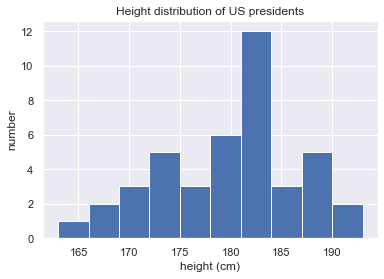

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(heights)
plt.title('Height distribution of US presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Computation on Arrays: Broadcasting

Broadcasting is simply a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc) on arrays of different sizes.

In [124]:
# Element-by-element addition
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [125]:
# Broadcasting a single value to each element
a + 5

array([5, 6, 7])

In [126]:
# Adding a two-dimensional and one-dimensional array
M = np.ones((3, 3))
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [127]:
# Adding two one-dimensional arrays with different shapes
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
a, b, a + b

(array([0, 1, 2]),
 array([[0],
        [1],
        [2]]),
 array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]]))

Rules of broadcasting in NumPy:

1. If two arrays differ in number of dimensions, the one with fewer dimensions is *padded* with ones on its leading (left) side.
2. If the shape of two arrays does not match in any dimensions, the array with shape equal to 1 in that dimensions is stretched to match the other shape.
3. If any dimensions the sizes disagree and neither is equal to 1, an error is raised.

In [128]:
M = np.ones((2, 3))
a = np.arange(3)
M.shape, a.shape

((2, 3), (3,))

In [129]:
# Rule 1: a.shape -> (1, 3)
# Rule 2: a.shape -> (2, 3) to match M
# Final shape is (2, 3)
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [130]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a.shape, b.shape

((3, 1), (3,))

In [131]:
# Rule 1: b.shape -> (1, 3)
# Rule 2: a.shape -> (3, 3); b.shape -> (3, 3)
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [132]:
M = np.ones((3, 2))
a = np.arange(3)
M.shape, a.shape

((3, 2), (3,))

In [133]:
# Rule 1: a.shape -> (1, 3)
# Rule 2: a.shape -> (3, 3)
# Rule 3: a.shape (3, 3) does not match b.shape (3, 2) so an error is returned
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [135]:
# Can add these arrays together by manually right-side padding
a[:, np.newaxis].shape, M + a[:, np.newaxis]

((3, 1),
 array([[1., 1.],
        [2., 2.],
        [3., 3.]]))

In [136]:
# A more complicated binary ufunc
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

In [140]:
# An array of 10 observations (rows), each of which consists of three values (features)
X = np.random.random((10, 3))
# The mean of each feature
X_mean = X.mean(axis = 0)
# Center the array by subtracting the mean
X_centered = X - X_mean
X_mean, X_centered, X_centered.mean(axis = 0)

(array([0.57844323, 0.55638119, 0.33778626]),
 array([[ 0.26654647, -0.02145914, -0.23017353],
        [ 0.19379292,  0.04592727, -0.16540326],
        [-0.34145351, -0.13564202, -0.28786824],
        [ 0.1324877 ,  0.33139913, -0.12891668],
        [-0.10077434, -0.06087672,  0.22896486],
        [ 0.09804565, -0.20449438,  0.14514136],
        [ 0.30982228, -0.43214721,  0.4400384 ],
        [-0.4996385 ,  0.35851003,  0.33709266],
        [ 0.27723991, -0.21583296, -0.1454327 ],
        [-0.33606858,  0.33461601, -0.19344287]]),
 array([ 1.11022302e-17, -5.55111512e-17, -1.11022302e-17]))

C:\Users\tdunn\AppData\Local\Temp\ipykernel_16084\1211650436.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


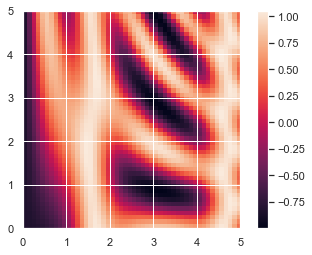

In [144]:
# Define a function z = f(x, y) using broadcasting
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# Plot the 2d array
plt.imshow(z, origin = 'lower', extent = [0, 5, 0, 5])
plt.colorbar();

## Comparisons, Masks, and Boolean Logic

Boolean masks are used to examine and manipulate values within NumPy arrays.

Example: counting rainy days.

In [148]:
rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape, inches[:5]

((365,), array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ]))

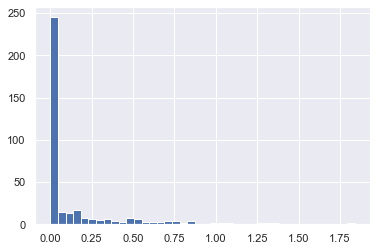

In [149]:
plt.hist(inches, 40);

In [150]:
# Six element-wise comparison operators available with NumPy
x = np.array([1, 2, 3, 4, 5])
x < 3, x > 3, x <= 3, x >= 3, x != 3, x == 3

(array([ True,  True, False, False, False]),
 array([False, False, False,  True,  True]),
 array([ True,  True,  True, False, False]),
 array([False, False,  True,  True,  True]),
 array([ True,  True, False,  True,  True]),
 array([False, False,  True, False, False]))

Internally, NumPy uses methods `np.less()`, `np.greater()`, etc.

In [152]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [154]:
# Count the number of True entries in a Boolean array with count_nonzero() or sum()
x < 6, np.count_nonzero(x < 6), np.sum(x < 6)

(array([[ True,  True,  True,  True],
        [False, False,  True,  True],
        [ True,  True, False, False]]),
 8,
 8)

In [155]:
# sum() can also count along rows and columns
np.sum(x < 6, axis = 1), np.sum(x < 6, axis = 0)

(array([4, 2, 2]), array([2, 2, 2, 2]))

In [159]:
# any() and all() quickly check whether all values are True
np.any(x > 8), np.any(x < 0), np.all(x < 10), np.all(x == 6), np.all(x < 8, axis = 1)

(True, False, True, False, array([ True, False,  True]))

Python uses *bitwise logic operators* `&`, `|`, `^` and `~`, which are overloaded with NumPy ufuncs to work with arrays.

In [160]:
# Number of days with rain between 0.5 to 1.0 inches
np.sum((inches > 0.5) & (inches < 1))

29

In [161]:
# Number of days with rain NOT less than or equal to 0.5 OR greater than or equal to 1.0
np.sum(~( (inches <= 0.5) | (inches >= 1)))

29

In [163]:
print("Days without rain:         ", np.sum(inches == 0))
print("Days with rain:            ", np.sum(inches != 0))
print("Days with rain >0.5 inches:", np.sum(inches > 0.5))
print("Days with rain <0.2 inches:", np.sum((inches > 0) & (inches < 0.2)))

Days without rain:          215
Days with rain:             150
Days with rain >0.5 inches: 37
Days with rain <0.2 inches: 75


In [165]:
# Select values with a masking operation
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [168]:
# Mask of rainy days
rainy = inches > 0
# Mask of all summary days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days: ", np.median(inches[rainy]))
print("Median precip on summer days: ", np.median(inches[summer]))
print("Max precip on summer days: ", np.max(inches[summer]))
print("Median precip on non-summer rainy days: ", np.median(inches[~summer & rainy]))


Median precip on rainy days:  0.19488188976377951
Median precip on summer days:  0.0
Max precip on summer days:  0.8503937007874016
Median precip on non-summer rainy days:  0.20078740157480315


## Fancy Indexing

Fancy indexing means passing an array of indices to access multiple array elements at once.

In [169]:
rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [170]:
ind = [3, 7, 4]
[x[3], x[7], x[4]], x[ind]

([71, 86, 60], array([71, 86, 60]))

In [171]:
# The shape of the result depends on the shape of the index, not the original array
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [172]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [173]:
# First index refers to the row, second to the column
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [175]:
# Combine column and row vector within the indices to get 1d result
X[row[:, np.newaxis], col], row[:, np.newaxis] * col

(array([[ 2,  1,  3],
        [ 6,  5,  7],
        [10,  9, 11]]),
 array([[0, 0, 0],
        [2, 1, 3],
        [4, 2, 6]]))

In [177]:
# Combine fancy and simple indices, slicing, and masking
mask = np.array([1, 0, 1, 0], dtype = bool)
X[2, [2, 0, 1]], X[1:, [2, 0, 1]], X[row[:, np.newaxis], mask]

(array([10,  8,  9]),
 array([[ 6,  4,  5],
        [10,  8,  9]]),
 array([[ 0,  2],
        [ 4,  6],
        [ 8, 10]]))

In [178]:
# Draw points from a 2d normal distribution
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

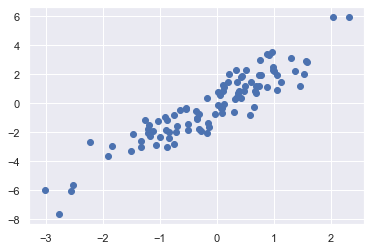

In [179]:
plt.scatter(X[:, 0], X[:, 1]);

In [181]:
# Select 20 random points
indices = np.random.choice(X.shape[0], 20, replace = False)
selection = X[indices] # fancy indexing
indices, selection.shape

(array([23, 33, 93, 42, 88, 63, 30, 25, 77, 17, 20, 14,  4, 11,  6, 34, 78,
        96, 60, 52]),
 (20, 2))

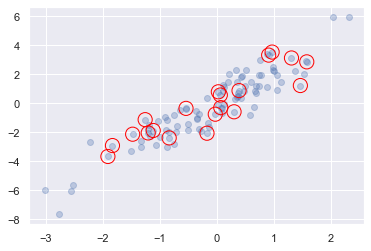

In [189]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor = 'none', s = 200, edgecolors = 'red');

In [190]:
# Modify an array with fancy indexing
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [191]:
# But careful with repeated indices
x = np.zeros(10)
# Assigns x[0] to 4, then overwrite x[0] to 6
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [192]:
i = [2, 3, 3, 4, 4, 4]
# Each index is incremented just once
x[i] += 1

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [196]:
# Use the at() ufunc to perform operations for elements indexed more than once
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


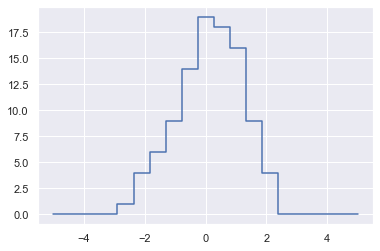

In [202]:
# Bin values for a manual histogram
np.random.seed(24)
x = np.random.randn(100)
bins = np.linspace(-5, 5, 20)
# Initialize a count array, same shape as bins
counts = np.zeros_like(bins)
# Find the bin for each x
i = np.searchsorted(bins, x)
# Add 1 to each of these bins
np.add.at(counts, i, 1)

# This doesn't work, linestype = 'steps' is not valid
#plt.plot(bins, counts, linestyle = 'steps');
plt.step(bins, counts);

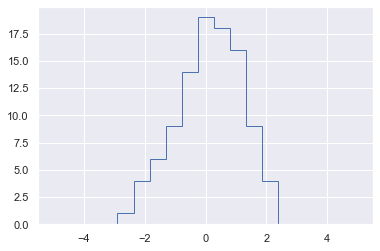

In [203]:
# Obviously the above can be done in one line
plt.hist(x, bins, histtype='step');

In [205]:
# NumPy has a histogram() method that is slower, but is more flexible to perform better with large data
%timeit counts, edges = np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

37.2 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
18.4 µs ± 391 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [206]:
x = np.random.randn(int(1e6))
%timeit counts, edges = np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

64.7 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
124 ms ± 583 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Sorting Arrays

In [207]:
# A hand-coded selection sort algorithm
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [209]:
# Return a sorted version of the array, without modifying the input
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [210]:
# Sort in-place
x.sort()
print(x)

[1 2 3 4 5]


In [211]:
# argsort() returns the indices of the sorted elements
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i, x[i]

(array([1, 0, 3, 2, 4], dtype=int64), array([1, 2, 3, 4, 5]))

In [212]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [215]:
# Sort each column and row
np.sort(X, axis = 0), np.sort(X, axis = 1)

(array([[2, 1, 4, 0, 1, 5],
        [5, 2, 5, 4, 3, 7],
        [6, 3, 7, 4, 6, 7],
        [7, 6, 7, 4, 9, 9]]),
 array([[3, 4, 6, 6, 7, 9],
        [2, 3, 4, 6, 7, 7],
        [1, 2, 4, 5, 7, 7],
        [0, 1, 4, 5, 5, 9]]))

In [218]:
# Paritition K smallest values to the left, and the remaining to the right
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3), np.partition(X, 2, axis = 1)

(array([2, 1, 3, 4, 6, 5, 7]),
 array([[3, 4, 6, 7, 6, 9],
        [2, 3, 4, 7, 6, 7],
        [1, 2, 4, 5, 7, 7],
        [0, 1, 4, 5, 9, 5]]))

Example: k-nearest neighbors.

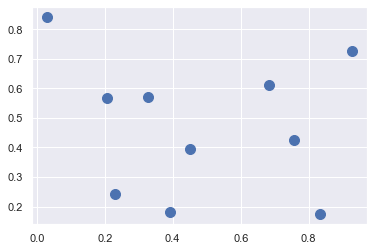

In [220]:
# Random set of 10 points on a 2d plane
X = rand.rand(10, 2)
plt.scatter(X[:, 0], X[:, 1], s = 100);

In [225]:
# Compute the distance between each pair of points
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
# Square the differences
sq_differences = differences ** 2
# Sum the differences to get squared distance
dist_sq = sq_differences.sum(-1)
# The diagonal should be zeroes
dist_diag = dist_sq.diagonal()

differences.shape, sq_differences.shape, dist_sq.shape, dist_diag

((10, 10, 2),
 (10, 10, 2),
 (10, 10),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [228]:
# Find the index of the nearest point
nearest = np.argsort(dist_sq, axis = 1)
nearest

array([[0, 3, 7, 5, 9, 4, 1, 2, 6, 8],
       [1, 4, 8, 7, 9, 2, 5, 3, 0, 6],
       [2, 4, 3, 7, 1, 8, 0, 9, 5, 6],
       [3, 0, 7, 9, 5, 4, 2, 1, 6, 8],
       [4, 1, 2, 7, 8, 3, 9, 0, 5, 6],
       [5, 9, 7, 6, 0, 3, 1, 4, 8, 2],
       [6, 5, 9, 7, 0, 1, 3, 4, 8, 2],
       [7, 9, 3, 0, 5, 4, 1, 2, 8, 6],
       [8, 1, 4, 2, 7, 9, 5, 3, 0, 6],
       [9, 5, 7, 0, 1, 3, 6, 4, 8, 2]], dtype=int64)

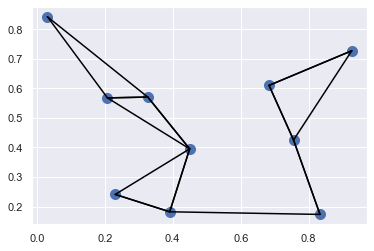

In [230]:
# Instead, find the 2 nearest neighbors
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

# Visualize the relationships
plt.scatter(X[:, 0], X[:, 1], s = 100)

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # Plot a line from X[i] to X[j]
        plt.plot(*zip(X[j], X[i]), color = 'black');

## Structured Data: NumPy's Structured Arrays

In [232]:
# Use a compound data type specification for structured arrays
data = np.zeros(4, dtype = {'names': ('name', 'age', 'weight'),
                            'formats': ('U10', 'i4', 'f8')})
# U10: unicode string of max length 10, i4: 4-byte integer, f8: 8-byte float
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [234]:
data['name'] = ['Alice', 'Bob', 'Cathy', 'Doug']
data['age'] = [25, 45, 37, 19]
data['weight'] = [55.0, 85.5, 68.0, 61.5]
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [235]:
# Get all names, get first row, get name from last row
data['name'], data[0], data[-1]['name']

(array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10'),
 ('Alice', 25, 55.),
 'Doug')

In [236]:
# Fancy indexing
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

In [237]:
# Create a data type with a 3x3 floating-point matrix
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype = tp)
X[0], X['mat'][0]

((0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [239]:
# RecordArrays allow fields to be access as attributes rather than dictionary keys
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

In [240]:
# Downside is the extra overhead
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

135 ns ± 1.53 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
2.88 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.74 µs ± 182 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
